<a href="https://colab.research.google.com/github/AlishbaMalik687-svg/AI-ML-Logistic-Regression-Model/blob/master/Machine_learning_model_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Model "Logistic Regression"

  Step 1: Importing Liberaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Step 2: Reading Dataset

In [ ]:
df=pd.read_csv('/content/ai_impact_student_performance_dataset.csv')
df.head(10)

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,1,20,Female,11,2.5,1,170,NaN,Exam Prep,10,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,2,17,Male,12,3.4,1,123,NaN,Notes,4,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
2,3,24,Male,13,0.8,0,35,Copilot,Doubt Solving,8,...,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,Medium
3,4,21,Female,12,4.4,0,45,ChatGPT+Gemini,Notes,3,...,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,Medium
4,5,18,Other,13,3.5,1,21,ChatGPT+Gemini,Coding,2,...,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,Low
5,6,20,Male,11,5.1,1,34,Copilot,Coding,10,...,9,8.0,13.4,5.5,3.7,2.1,4,77.9,1,High
6,7,23,Female,11,2.0,1,112,ChatGPT+Gemini,NaN,8,...,9,9.6,3.7,5.8,1.6,3.4,5,82.2,1,High
7,8,16,Male,13,5.5,0,174,ChatGPT,Homework,4,...,6,4.3,13.2,6.0,0.4,2.5,6,52.7,1,Medium
8,9,20,Female,10,6.0,1,32,Copilot,NaN,9,...,9,7.8,18.8,5.4,1.6,4.2,4,81.7,1,High
9,10,24,Female,11,5.6,0,140,NaN,Doubt Solving,3,...,7,2.9,38.5,7.2,0.7,4.6,1,66.7,1,Medium


 Step 3: Dataset Information

In [ ]:
print('shape:',df.shape)
print('columns:',df.columns)
print('info:',df.info())

shape: (8000, 26)
columns: Index(['student_id', 'age', 'gender', 'grade_level', 'study_hours_per_day',
       'uses_ai', 'ai_usage_time_minutes', 'ai_tools_used', 'ai_usage_purpose',
       'ai_dependency_score', 'ai_generated_content_percentage',
       'ai_prompts_per_week', 'ai_ethics_score', 'last_exam_score',
       'assignment_scores_avg', 'attendance_percentage',
       'concept_understanding_score', 'study_consistency_index',
       'improvement_rate', 'sleep_hours', 'social_media_hours',
       'tutoring_hours', 'class_participation_score', 'final_score', 'passed',
       'performance_category'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       8000 non-null   int64  
 1   age                              8000 non-null   int64  
 2   gende

Step 4: Spliting Features and Target

In [ ]:
a=df.drop(['gender', 'performance_category'],axis=1)
b=df['performance_category']

a.head()
b.head()

,performance_category
0,Low
1,Medium
2,Medium
3,Medium
4,Low


Step 5: Train Test Spliting

In [ ]:
a_train,a_test,b_train,b_test = train_test_split(a, b, test_size=0.2, random_state=42)
print( 'Training Data:',a_train.shape)
print('Testing Data:',a_test.shape)

Training Data: (6400, 24)
Testing Data: (1600, 24)


In [ ]:
a_train.dtypes

,0
student_id,int64
age,int64
grade_level,int64
study_hours_per_day,float64
uses_ai,int64
ai_usage_time_minutes,int64
ai_tools_used,object
ai_usage_purpose,object
ai_dependency_score,int64
ai_generated_content_percentage,int64


Step 6: Standard scaler

In [ ]:
a_train = a_train.select_dtypes(include=['int64', 'float64'])
a_test  = a_test.select_dtypes(include=['int64', 'float64'])

Scaler=StandardScaler()
a_train=Scaler.fit_transform(a_train)
a_test=Scaler.transform(a_test)


Step 7: Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(a_train,b_train)
lr_pred=lr.predict(a_test)

print('Accuracy:', accuracy_score(b_test, lr_pred))


Accuracy: 0.99125


 Step 8: Confusion Matrix

In [ ]:
print(confusion_matrix(b_test, lr_pred))
print(classification_report(b_test, lr_pred))

[[152   0   7]
 [  0 542   3]
 [  2   2 892]]
              precision    recall  f1-score   support

        High       0.99      0.96      0.97       159
         Low       1.00      0.99      1.00       545
      Medium       0.99      1.00      0.99       896

    accuracy                           0.99      1600
   macro avg       0.99      0.98      0.99      1600
weighted avg       0.99      0.99      0.99      1600



 Step 9: Confusion matrix Visualization

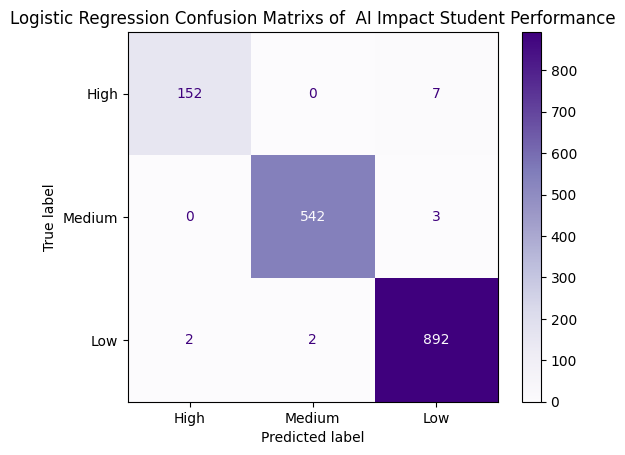

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(b_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High','Medium','Low'])

disp.plot(cmap='Purples')
plt.title('Logistic Regression Confusion Matrixs of  AI Impact Student Performance')
plt.show()
